In [44]:
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

In [45]:
mnist= input_data.read_data_sets('/Users/zyan/program/ml/datasets/MNIST_data/',one_hot=True)

Extracting /Users/zyan/program/ml/datasets/MNIST_data/train-images-idx3-ubyte.gz
Extracting /Users/zyan/program/ml/datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /Users/zyan/program/ml/datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /Users/zyan/program/ml/datasets/MNIST_data/t10k-labels-idx1-ubyte.gz


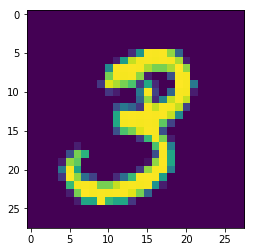

In [46]:
plt.imshow(mnist.train.images[1].reshape(28,28))

In [47]:
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [76]:
x,y=mnist.train.images,mnist.train.labels

In [77]:
y.shape

(55000, 10)

In [78]:
x.shape

(55000, 784)

In [79]:
x_train,x_test,y_train,y_test=x[:30000],x[30000:],y[:30000],y[30000:]

In [80]:
import numpy as np

In [81]:
shuffle_index = np.random.permutation(30000)
x_train,y_train=x_train[shuffle_index],y_train[shuffle_index]

In [82]:
from sklearn.linear_model import SGDClassifier

In [83]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [86]:
y_train_5.shape

(30000, 10)

In [84]:
sgd_clf=SGDClassifier(random_state=2)
sgd_clf.fit(x_train,y_train_5)

/Users/zyan/anaconda/envs/DeepLearning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


ValueError: bad input shape (30000, 10)

In [77]:
sgd_clf.predict(x_test)

array([False, False, False, ..., False, False, False])

In [78]:
from sklearn.model_selection import cross_val_score

In [79]:
from sklearn.model_selection import cross_val_predict

In [80]:
y_score = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3,method='decision_function')

/Users/zyan/anaconda/envs/DeepLearning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/zyan/anaconda/envs/DeepLearning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

In [81]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [82]:
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_score)

In [83]:
def plot(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='precision')
    plt.plot(thresholds,recalls[:-1],'g',label='recall')
    plt.xlabel('Threshold')
    plt.legend()

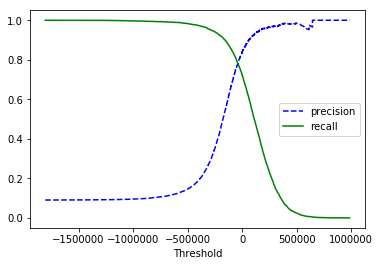

In [84]:
plot(precisions,recalls,thresholds)

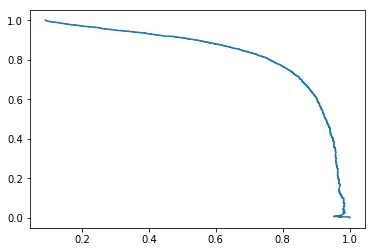

In [85]:
plt.plot(precisions,recalls)

# ROC Curve

In [86]:
from sklearn.metrics import roc_curve

In [87]:
fpr,tpr,tresholds=roc_curve(y_train_5,y_score)

In [88]:
def plot_roc_curve(fpr,tpr,tresholds):
    plt.plot(thresholds[:3405],fpr,'b--',label='fpr')
    plt.plot(thresholds[:3405],tpr,'g',label='tpr')
    plt.legend()   

ValueError: x and y must have same first dimension, but have shapes (3405,) and (3543,)

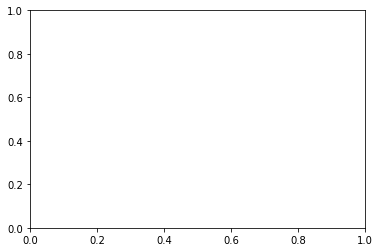

In [89]:
plot_roc_curve(fpr,tpr,thresholds)

Text(0,0.5,'TPR')

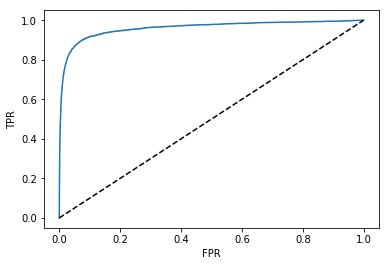

In [90]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')

# one-versus-all training multiple class 

In [91]:
sgd_clf.fit(x_train,y_train)

/Users/zyan/anaconda/envs/DeepLearning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [92]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [93]:
sgd_predict = sgd_clf.predict(x_train)

In [94]:
(~(sgd_predict==y_train)).sum()

9864

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
forest_clf = RandomForestClassifier()
forest_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [97]:
forest_predict = forest_clf.predict(x_train)

In [98]:
(~(forest_predict==y_train)).sum()

46

In [99]:
from sklearn.cross_validation import cross_val_score

/Users/zyan/anaconda/envs/DeepLearning/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [100]:
cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring='accuracy')

/Users/zyan/anaconda/envs/DeepLearning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/zyan/anaconda/envs/DeepLearning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

array([0.84688062, 0.87434372, 0.85452818])

In [101]:
cross_val_score(forest_clf,x_train,y_train,cv=3,scoring='accuracy')

array([0.93956209, 0.94339717, 0.94024104])

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scalar=StandardScaler()

In [104]:
x_train_scaled = scalar.fit_transform(x_train.astype(np.float64))

In [105]:
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=3,scoring='accuracy')

/Users/zyan/anaconda/envs/DeepLearning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/zyan/anaconda/envs/DeepLearning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

array([0.91016797, 0.91144557, 0.90793619])

In [106]:
cross_val_score(forest_clf,x_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.94156169, 0.9420471 , 0.9386908 ])

In [107]:
y_train

array([2., 5., 4., ..., 7., 2., 1.])

In [108]:
y_train_pred=cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)

/Users/zyan/anaconda/envs/DeepLearning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/Users/zyan/anaconda/envs/DeepLearning/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

In [109]:
y_train_pred

array([2., 6., 4., ..., 9., 2., 1.])

In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
conf_mx=confusion_matrix(y_train,y_train_pred)

In [112]:
conf_mx

array([[5720,    3,   29,   11,   11,   51,   47,   10,   37,    4],
       [   1, 6493,   44,   25,    6,   45,    6,   11,  100,   11],
       [  51,   41, 5362,   95,   78,   22,   80,   62,  150,   17],
       [  47,   41,  138, 5338,    2,  235,   32,   56,  136,  106],
       [  19,   26,   44,    8, 5350,   10,   54,   29,   70,  232],
       [  63,   46,   39,  187,   72, 4625,  105,   29,  163,   92],
       [  31,   28,   55,    2,   40,   96, 5618,    4,   44,    0],
       [  20,   23,   73,   27,   53,   10,    5, 5801,   18,  235],
       [  52,  164,   77,  151,   15,  164,   55,   32, 4996,  145],
       [  40,   42,   28,   86,  150,   37,    2,  200,   76, 5288]])

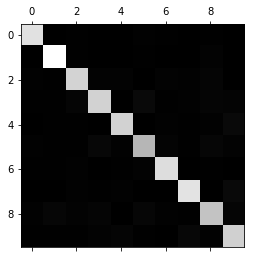

In [113]:
plt.matshow(conf_mx,cmap=plt.cm.gray)

In [114]:
a =np.reshape(x_train[1],(28,28))

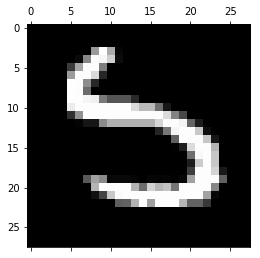

In [115]:
plt.matshow(a,cmap=plt.cm.gray)

In [117]:
row_sums = conf_mx.sum(axis=1,keepdims=True)

In [119]:
norm_conf_mx = conf_mx/row_sums

In [120]:
norm_conf_mx

array([[9.65726828e-01, 5.06500084e-04, 4.89616748e-03, 1.85716698e-03,
        1.85716698e-03, 8.61050144e-03, 7.93516799e-03, 1.68833361e-03,
        6.24683437e-03, 6.75333446e-04],
       [1.48323939e-04, 9.63067339e-01, 6.52625334e-03, 3.70809849e-03,
        8.89943637e-04, 6.67457728e-03, 8.89943637e-04, 1.63156333e-03,
        1.48323939e-02, 1.63156333e-03],
       [8.55991944e-03, 6.88150386e-03, 8.99966432e-01, 1.59449480e-02,
        1.30916415e-02, 3.69251427e-03, 1.34273246e-02, 1.04061766e-02,
        2.51762336e-02, 2.85330648e-03],
       [7.66595988e-03, 6.68732670e-03, 2.25085630e-02, 8.70657315e-01,
        3.26211059e-04, 3.83297994e-02, 5.21937694e-03, 9.13390964e-03,
        2.21823520e-02, 1.72891861e-02],
       [3.25231085e-03, 4.45053064e-03, 7.53166724e-03, 1.36939404e-03,
        9.15782266e-01, 1.71174255e-03, 9.24340979e-03, 4.96405341e-03,
        1.19821979e-02, 3.97124273e-02],
       [1.16214721e-02, 8.48551928e-03, 7.19424460e-03, 3.44954805e-02,
   

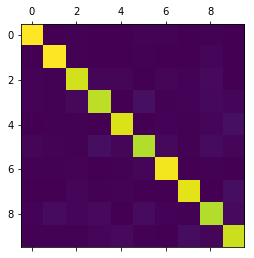

In [121]:
plt.matshow(norm_conf_mx)

In [122]:
np.fill_diagonal(norm_conf_mx,0)

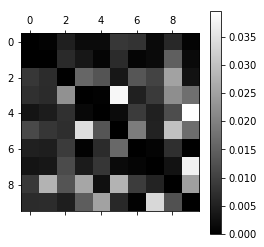

In [125]:
plt.matshow(norm_conf_mx,cmap='gray')
plt.colorbar()

In [132]:
num_a,num_b =3,5
x_aa = x_train[(y_train==num_a)&(y_train_pred==num_a)]
x_ab = x_train[(y_train==num_a)&(y_train_pred==num_b)]
x_bb = x_train[(y_train==num_b)&(y_train_pred==num_a)]
x_ba = x_train[(y_train==num_b)&(y_train_pred==num_b)]


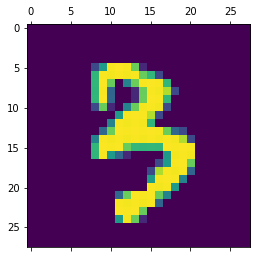

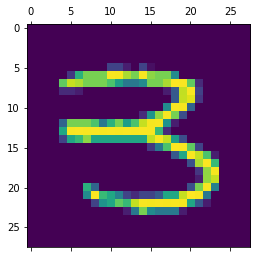

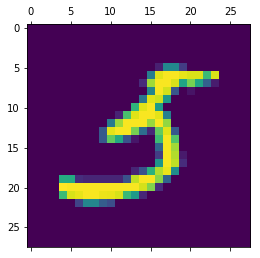

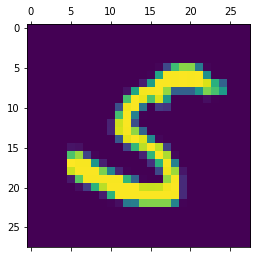

In [155]:
plt.matshow(x_aa[:1].reshape(28,28))
plt.matshow(x_ab[:1].reshape(28,28))
plt.matshow(x_bb[:1].reshape(28,28))
plt.matshow(x_ba[:1].reshape(28,28))
plt.show()

# Multilabel classification

In [156]:
from sklearn.neighbors import KNeighborsClassifier

In [157]:
y_train_large=(y_train>=7)

In [160]:
y_train_odd = (y_train%2==1)

In [162]:
y_multilabel=np.c_[y_train_large,y_train_odd]

In [163]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [165]:
knn_clf.predict([x_train[1]])

array([[False,  True]])

In [166]:
y_train[1]

5.0

In [ ]:
y_train_knn_pred=cross_val_predict(knn_clf,x_train,y_train,cv=3)

In [ ]:
f1s